# Polynomial Regression Model

## import libs

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import numpy as np
import pandas as pd

## read data base

In [3]:
data = pd.read_csv('CLEANED_sobolsampling-2048.csv')
#print(f'{data}')
data = data.drop(data.columns[0], axis=1)
#data = data.transpose()
#print(f'{data}')

## prepare data

In [4]:
X = data.drop('density', axis=1)
#print(f'{X}')

Y = data['density']
#print(f'{Y}')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state=29)

## create and train the model for different polynomial degrees

In [6]:
models = []
predictions = []
RMSEs = []
R2s = []
for n in range(1, 20):
    ## creation the pipeline
    model = make_pipeline(PolynomialFeatures(degree=n), LinearRegression())
    
    ## train/fit the model
    model.fit(X_train, Y_train)
    models.append(model)
    
    ## prediction using the test set
    Y_prediction = model.predict(X_test)
    predictions.append(Y_prediction)
    
    ## evaluate with Y_test
    rmse = np.sqrt(mean_squared_error(Y_test, Y_prediction))
    RMSEs.append(rmse)
    r2 = r2_score(Y_test, Y_prediction)
    R2s.append(r2)
    print(f'n =\t{n}')
    print(f'RMSE:\t{rmse}')
    print(f'R2:\t{r2}')
    print(f'')

n =	1
RMSE:	70.98544157212672
R2:	0.6015651228280929

n =	2
RMSE:	33.04517071740261
R2:	0.9136554817424714

n =	3
RMSE:	11.33260747130461
R2:	0.9898450342327408

n =	4
RMSE:	8.92175018674004
R2:	0.9937061137686308

n =	5
RMSE:	6.763933397498402
R2:	0.996382426062133

n =	6
RMSE:	6.2136879256999125
R2:	0.9969470643783853

n =	7
RMSE:	6.757537430584874
R2:	0.9963892643741855

n =	8
RMSE:	7.230447578639616
R2:	0.9958662031055541

n =	9
RMSE:	8.760243734880303
R2:	0.9939319220598151

n =	10
RMSE:	12.438894137705027
R2:	0.987765610169103

n =	11
RMSE:	25.904285504922477
R2:	0.9469406400135034

n =	12
RMSE:	53.69022255266699
R2:	0.7720659646065086

n =	13
RMSE:	65.78994812976538
R2:	0.6577544113369642

n =	14
RMSE:	72.13384056777235
R2:	0.5885691221809697

n =	15
RMSE:	82.80593379516786
R2:	0.4578222522572861

n =	16
RMSE:	107.18791045529338
R2:	0.09153043876499944

n =	17
RMSE:	179.23584505676692
R2:	-1.54020347995265

n =	18
RMSE:	227.9125251636074
R2:	-3.1072880056731567

n =	19
RMSE:	235

## Result

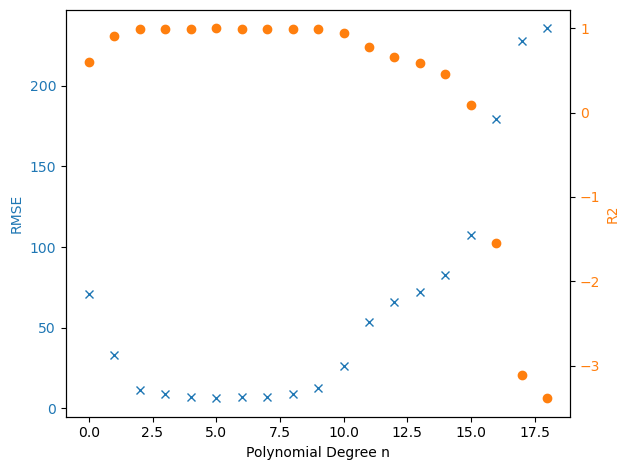

In [18]:
from matplotlib import pyplot as plt
#print(f'{RMSEs}')
#print(f'{R2s}')

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Polynomial Degree n')
ax1.set_ylabel('RMSE', color=color)
ax1.plot(RMSEs, 'x', color=color, label='RMSE')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color='tab:orange'
ax2.set_ylabel('R2', color=color)
ax2.plot(R2s, 'o', color=color, label='R2')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


## Results

best fit between n = 3 and n = 6